In [1]:
import os
import sys
import importlib
print(sys.path)
%pwd

os.chdir('/home/rfpred')
sys.path.append('/home/rfpred/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode')


['/home/rfpred/notebooks/clean', '/home/rfpred/envs/rfenv/lib/python311.zip', '/home/rfpred/envs/rfenv/lib/python3.11', '/home/rfpred/envs/rfenv/lib/python3.11/lib-dynload', '', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages', '/home/rfpred/notebooks/alien_nbs/lgnpy', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsd_access-0.0.1.dev0-py3.11.egg', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/cifti-1.1-py3.11.egg']


In [2]:
import funcs.brain_mapping
importlib.reload(funcs.brain_mapping)

from funcs.brain_mapping import reg_to_nifti, vol_to_surf

from classes.regdata import RegData
from funcs.reloads import Reloader
from classes.natspatpred import NatSpatPred
from classes.voxelsieve import VoxelSieve
NSP = NatSpatPred()
NSP.initialise(verbose=True)
rl = Reloader()

Naturalistic Spatial Prediction class: Initialised

Class contains the following attributes:
 .analyse
 .attributes
 .cortex
 .datafetch
 .explore
 .hidden_methods
 .initialise
 .nsd_datapath
 .own_datapath
 .stimuli
 .subjects
 .utils


### Baseline model performance work

In [3]:


for subject in NSP.subjects:
    print(f"Working on {subject}")
    # subject = "subj05"
    reg_to_nifti(subject=subject,
                reg_type="unpred",
                model="vggfull",
                assign_stat="max",
                reg_stat="R",
                plot_brain=False,
                plot_lay_assign=False,
                save_nifti=True,
                verbose=True,
                mean_delta_r=False)

Working on subj01
        x   y   z roi       R_2       R_3       R_4       R_5       R_6  \
0      56   8  75  V1  0.071258  0.075079  0.073251  0.072781  0.070970   
1      56   9  74  V1  0.037536  0.040949  0.040035  0.040002  0.038152   
2      56   9  76  V1  0.050872  0.053501  0.052431  0.052108  0.051515   
3      56  10  75  V1  0.039483  0.041818  0.040966  0.040790  0.039803   
4      56  10  76  V1  0.040446  0.042842  0.041389  0.041171  0.040102   
...   ...  ..  ..  ..       ...       ...       ...       ...       ...   
2521  113  26  69  V4  0.136464  0.136463  0.135771  0.134846  0.135099   
2522  113  28  61  V4  0.007003  0.006513  0.006104  0.005729  0.006373   
2523  114  25  69  V4  0.115529  0.116371  0.114761  0.113676  0.113560   
2524  114  26  67  V4  0.150638  0.149114  0.147882  0.146709  0.148815   
2525  114  27  64  V4  0.011993  0.011615  0.011589  0.011548  0.011756   

           R_7       R_8       R_9      R_10      R_11      R_12      R_13  \
0  

In [4]:
for subject in NSP.subjects:
# print(f"Working on {subject}")  
        
        vol_to_surf(subject=subject,
                source_file_name="unpred_vggfull_R",
                interpmethod="cubic",
                )

### Make nifti files based on specific regression results

In [9]:
# for subject in NSP.subjects:
#     print(f"Working on {subject}")
#     # subject = "subj05"
#     reg_to_nifti(subject=subject,
#                 reg_type="unpred",
#                 model="vggfull",
#                 assign_stat="max",
#                 reg_stat="delta_r",
#                 plot_brain=False,
#                 plot_lay_assign=False,
#                 save_nifti=True,
#                 verbose=True,
#                 mean_delta_r=True)

for subject in NSP.subjects:
    print(f"Working on {subject}")
    # subject = "subj05"
    reg_to_nifti(subject=subject,
                reg_type="unpred",
                model="vggfull",
                assign_stat="max",
                reg_stat="beta_unpred",
                plot_brain=False,
                plot_lay_assign=False,
                save_nifti=True,
                verbose=True,
                mean_delta_r=True)

Working on subj01
        x   y   z roi  beta_unpred_2  beta_unpred_3  beta_unpred_4  \
0      56   8  75  V1       0.025816       0.027257       0.026944   
1      56   9  74  V1       0.019701       0.021052       0.020905   
2      56   9  76  V1       0.022882       0.023993       0.023863   
3      56  10  75  V1       0.019363       0.020361       0.020244   
4      56  10  76  V1       0.018772       0.019809       0.019527   
...   ...  ..  ..  ..            ...            ...            ...   
2521  113  26  69  V4       0.081230       0.080533       0.080477   
2522  113  28  61  V4       0.015642       0.015608       0.015480   
2523  114  25  69  V4       0.109543       0.109398       0.107979   
2524  114  26  67  V4       0.152391       0.148429       0.147189   
2525  114  27  64  V4       0.006012       0.004380       0.005383   

      beta_unpred_5  beta_unpred_6  beta_unpred_7  beta_unpred_8  \
0          0.026777       0.025891       0.026675       0.027938   
1    

In [10]:
for subject in NSP.subjects:
# print(f"Working on {subject}")  
        
        vol_to_surf(subject=subject,
                source_file_name="unpred_vggfull_beta_unpred",
                interpmethod="cubic",
                )

In [3]:
for subject in NSP.subjects:
    print(f"Working on {subject}")
    # subject = "subj05"
    reg_to_nifti(subject=subject,
                reg_type="encoding",
                model="VGG",
                assign_stat="max",
                reg_stat="delta_r",
                plot_brain=False,
                plot_lay_assign=False,
                save_nifti=True,
                verbose=True)

Working on subj01


         x   y   z roi  delta_r_1  delta_r_3  delta_r_6  delta_r_8  \
0       55   7  77  V1   0.000000   0.389488   0.592121   0.702513   
1       55  11  75  V1   0.226572   0.556553   0.967471   0.690021   
2       56   7  76  V1   0.000000   0.112139   0.502825   0.502724   
3       56   7  77  V1   0.444122   0.768348   0.785165   0.478667   
4       56   7  78  V1   1.000000   0.986705   0.414089   0.329508   
...    ...  ..  ..  ..        ...        ...        ...        ...   
27176  114  28  65  V4   0.163353   0.000000   0.613225   0.529675   
27177  114  28  66  V4   0.000000   0.041205   0.370714   0.501538   
27178  114  29  62  V4   0.000000   0.373132   0.599396   0.388931   
27179  115  28  64  V4   0.000000   0.177272   0.510690   0.707401   
27180  115  28  65  V4   0.116544   0.314804   0.398240   0.000000   

       delta_r_11  delta_r_13  delta_r_15  delta_r_18  delta_r_20  delta_r_22  \
0        0.795054    0.371885    0.035587    0.668762    0.413156    0.655852 

In [4]:
for subject in NSP.subjects:
# print(f"Working on {subject}")  
        
        vol_to_surf(subject=subject,
                source_file_name="encoding_VGG_layassign_max",
                interpmethod="wta",
                )

In [7]:
for subject in NSP.subjects:
    print(f"Working on {subject}")
# subject = "subj01"
    reg_to_nifti(subject=subject,
                reg_type="unpred",
                model="vgg-b",
                reg_stat="delta_beta",
                plot_brain=False,
                plot_lay_assign=False,
                save_nifti=True,
                verbose=True)

Working on subj01
        x   y   z roi  delta_beta_1  delta_beta_2  delta_beta_3  delta_beta_4  \
0      56   8  75  V1     -0.000001      0.002241      0.001205     -0.000262   
1      56   9  74  V1     -0.000077      0.001635      0.000536     -0.000865   
2      56   9  76  V1      0.000037      0.001953      0.001057     -0.000288   
3      56  10  75  V1      0.000259      0.001830      0.000978     -0.000371   
4      56  10  76  V1     -0.000125      0.001487      0.000644     -0.000654   
...   ...  ..  ..  ..           ...           ...           ...           ...   
2521  113  26  69  V4      0.002329      0.006052      0.007095      0.007935   
2522  113  28  61  V4      0.000341      0.000796      0.001194      0.002224   
2523  114  25  69  V4      0.003936      0.009536      0.011083      0.012477   
2524  114  26  67  V4      0.008692      0.013876      0.018739      0.022968   
2525  114  27  64  V4      0.001256      0.000399      0.002080      0.003588   

      del

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.


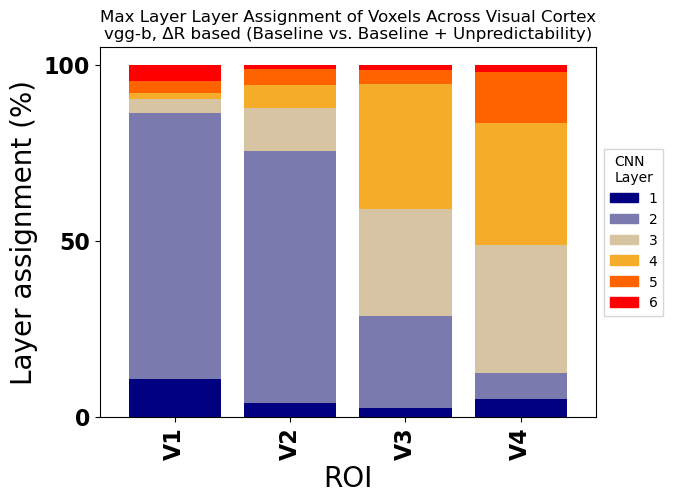

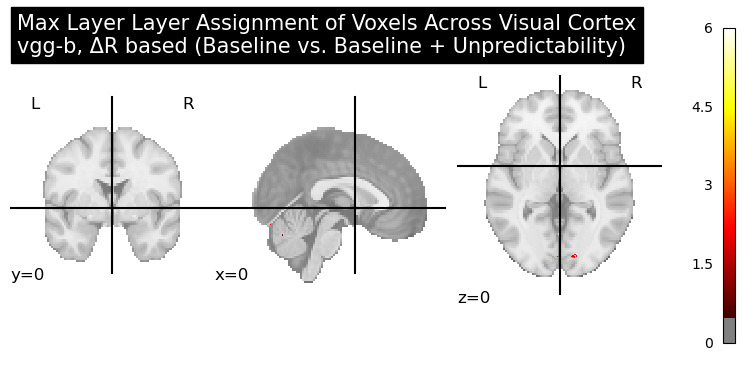

In [6]:
reg_to_nifti(subject="subj02",
             reg_type="unpred",
             model="vgg-b",
             assign_stat="max",
             reg_stat="delta_r",
             plot_brain=True,
             plot_lay_assign=True)

In [ ]:
for subject in NSP.subjects:
    print(f"Working on {subject}")
    reg_to_nifti(subject=subject,
                reg_type="unpred",
                model="vgg-b",
                assign_stat="max",
                reg_stat="delta_r",
                plot_brain=False,
                plot_lay_assign=True,
                save_nifti=True,
                mean_delta_r=True)

### Turn volume space brains into surface space brains

In [8]:
# For a single sub
for subject in NSP.subjects:

    vol_to_surf(subject=subject,
                source_file_name="unpred_vgg-b_delta_beta")

In [ ]:
# For a single sub
vol_to_surf(subject="subj02",
            source_file_name="unpred_vgg-b_layassign_max")

In [ ]:
for subject in NSP.subjects:
    vol_to_surf(subject=subject,
                source_file_name="unpred_vgg-b_mean_delta_r",
                interpmethod="nearest")

# VGG8 brain mappings

In [5]:
for subject in NSP.subjects:
    print(f"Working on {subject}")
# subject = "subj01"
    reg_to_nifti(subject=subject,
                reg_type="unpred",
                model="vgg8",
                reg_stat="delta_r",
                plot_brain=False,
                plot_lay_assign=False,
                save_nifti=True,
                mean_delta_r=True,
                verbose=True)

Working on subj01
Processing file vgg8_lay6_regdf.csv for layer 7
Processing file vgg8_lay3_regdf.csv for layer 4
Processing file vgg8_lay4_regdf.csv for layer 5
Processing file vgg8_lay0_regdf.csv for layer 1
Processing file vgg8_lay5_regdf.csv for layer 6
Processing file vgg8_lay2_regdf.csv for layer 3
Processing file vgg8_lay1_regdf.csv for layer 2
Processing file vgg8_lay7_regdf.csv for layer 8
        x   y   z roi  delta_r_1  delta_r_2  delta_r_3  delta_r_4  delta_r_5  \
0      56   8  75  V1   0.866967   1.000000   0.935739   0.791335   0.671755   
1      56   9  74  V1   0.863629   1.000000   0.962561   0.816150   0.676325   
2      56   9  76  V1   0.865488   1.000000   0.943715   0.832040   0.736092   
3      56  10  75  V1   0.878082   1.000000   0.954303   0.829937   0.721889   
4      56  10  76  V1   0.882602   1.000000   0.927432   0.795449   0.685064   
...   ...  ..  ..  ..        ...        ...        ...        ...        ...   
2521  113  26  69  V4   0.999306   0.9

In [7]:
for subject in NSP.subjects:

    vol_to_surf(subject=subject,
                source_file_name="unpred_vgg8_beta_unpred",
                interpmethod="cubic")

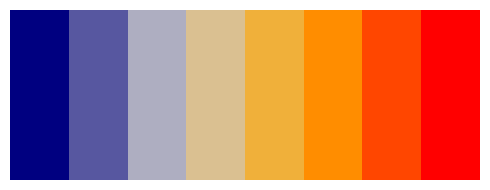

In [11]:
from matplotlib.colors import LinearSegmentedColormap

barcmap = LinearSegmentedColormap.from_list('NavyBlueVeryLightGreyDarkRed', ['#000080', '#CCCCCC', '#FFA500', '#FF0000'], N=8)

NSP.utils.display_cmap(barcmap)

# Voxel masks for all subs

In [3]:
# /home/rfpred/data/natural-scenes-dataset/nsddata/ppdata/subj01/func1mm/roi/prf-visualrois.nii.gz

for subject in NSP.subjects:
    filepath = f"/home/rfpred/data/natural-scenes-dataset/nsddata/ppdata/{subject}/func1mm/roi/prf-visualrois.nii.gz"
    vol_to_surf(subject=subject,
                source_file_name="",
                interpmethod="wta",
                custom_path=filepath
                )

In [5]:
subject = "subj01"

rois, roi_masks, viscortex_mask = NSP.cortex.visrois_dict(verbose=False)
prf_dict = NSP.cortex.prf_dict(rois, roi_masks)

max_size = 2
min_size = .15
patchbound = 1
min_nsd_R2 = 0
min_prf_R2 = 0

voxeldict = {}
n_voxels = []
for roi in rois:
    print_attr = True if roi == rois[len(rois)-1] else False
    voxeldict[roi] = VoxelSieve(NSP, prf_dict, roi_masks,
                                subject=subject, 
                                roi=roi,
                                patchloc='central', 
                                max_size=max_size, 
                                min_size=min_size, 
                                patchbound=patchbound, 
                                min_nsd_R2=min_nsd_R2, 
                                min_prf_R2=min_prf_R2,
                                print_attributes=print_attr,
                                fixed_n_voxels=None)
    n_voxels.append(len(voxeldict[roi].size))
    
# max_n_voxels = np.min(n_voxels)




V1 voxels that fulfill requirements: 437 out of 7887.
V2 voxels that fulfill requirements: 805 out of 8296.
V3 voxels that fulfill requirements: 746 out of 7022.
V4 voxels that fulfill requirements: 538 out of 3976.

Class contains the following attributes:
 .angle
 .ecc
 .figdims
 .nsd_R2
 .patchbound
 .patchcoords
 .patchmask
 .prf_R2
 .sigmas
 .size
 .vox_lim
 .vox_pick
 .xcoor
 .xyz
 .ycoor




In [21]:
import numpy as np

        
        

(437, 3)
(1242, 3)
(1988, 3)
(2526, 3)


In [39]:

max_size = 2
min_size = .15
patchbound = 1
min_nsd_R2 = 0
min_prf_R2 = 0



for subject in NSP.subjects:
    voxeldict = {}
    n_voxels = []
    for roi in rois:
        print_attr = True if roi == rois[len(rois)-1] else False
        voxeldict[roi] = VoxelSieve(NSP, prf_dict, roi_masks,
                                    subject=subject, 
                                    roi=roi,
                                    patchloc='central', 
                                    max_size=max_size, 
                                    min_size=min_size, 
                                    patchbound=patchbound, 
                                    min_nsd_R2=min_nsd_R2, 
                                    min_prf_R2=min_prf_R2,
                                    print_attributes=print_attr,
                                    fixed_n_voxels=None)
        n_voxels.append(len(voxeldict[roi].size))
        
        
    
    
    for i in range(1, 5):
        
        if i == 1:
            voxxyz = voxeldict[f"V{i}"].xyz
        else:
            voxxyz = np.concatenate((voxxyz, voxeldict[f"V{i}"].xyz), axis=0)
            
        print(voxxyz.shape)
            
    
    _ = NSP.utils.coords2nifti(subject=subject,
                        prf_dict=prf_dict,
                        coords=voxxyz,
                        keep_vals=False,
                        save_nifti=True,
                        file_name="voxelselection")

    vol_to_surf(subject=subject,
            source_file_name="voxelselection",
            interpmethod="wta",
            )


V1 voxels that fulfill requirements: 437 out of 7887.
V2 voxels that fulfill requirements: 805 out of 8296.
V3 voxels that fulfill requirements: 746 out of 7022.
V4 voxels that fulfill requirements: 538 out of 3976.

Class contains the following attributes:
 .angle
 .ecc
 .figdims
 .nsd_R2
 .patchbound
 .patchcoords
 .patchmask
 .prf_R2
 .sigmas
 .size
 .vox_lim
 .vox_pick
 .xcoor
 .xyz
 .ycoor


(437, 3)
(1242, 3)
(1988, 3)
(2526, 3)
V1 voxels that fulfill requirements: 176 out of 6476.
V2 voxels that fulfill requirements: 400 out of 6376.
V3 voxels that fulfill requirements: 693 out of 6236.
V4 voxels that fulfill requirements: 299 out of 2887.

Class contains the following attributes:
 .angle
 .ecc
 .figdims
 .nsd_R2
 .patchbound
 .patchcoords
 .patchmask
 .prf_R2
 .sigmas
 .size
 .vox_lim
 .vox_pick
 .xcoor
 .xyz
 .ycoor


(176, 3)
(576, 3)
(1269, 3)
(1568, 3)
V1 voxels that fulfill requirements: 198 out of 7358.
V2 voxels that fulfill requirements: 552 out of 6721.
V3 voxels that 

In [37]:
# for subject in NSP.subjects:

filepath = f"/home/rfpred/data/custom_files/{subject}/stat_volumes/"#voxelselection.nii"
vol_to_surf(subject=subject,
            source_file_name="voxelselection",
            interpmethod="wta",
            # custom_path=filepath
            )